In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
winedata = pd.read_csv('/content/winequality-red.csv')

In [ ]:
winedata.shape

(1599, 12)

In [ ]:
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
winedata.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#print columns name
print(winedata.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


<Axes: xlabel='quality', ylabel='citric acid'>

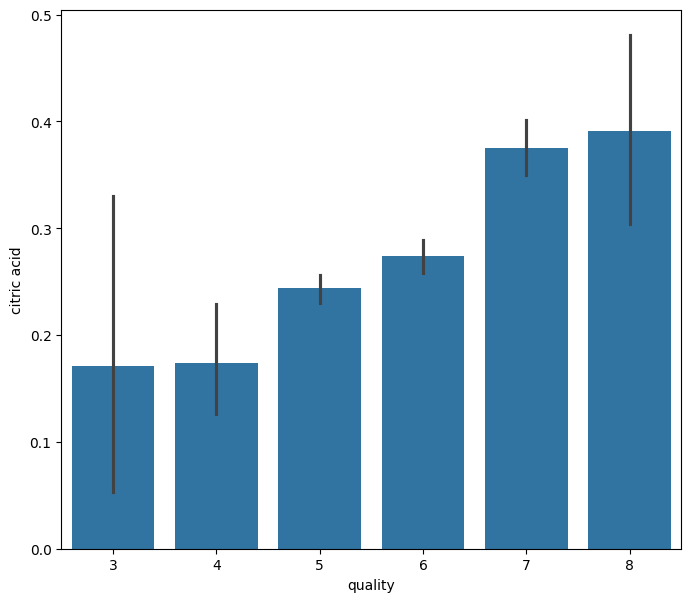

In [ ]:
#citric acid  vs quality
plot=plt.figure(figsize=(8,7))
sns.barplot(x='quality' ,y= 'citric acid', data=winedata)

correlation heatmap

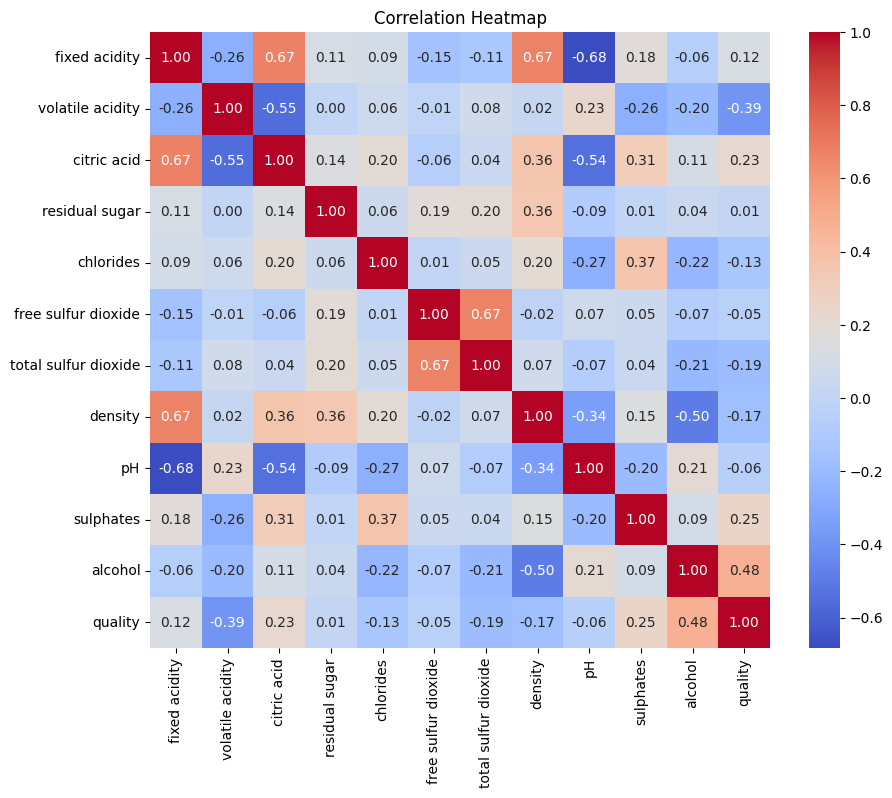

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(winedata.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

histogram for quality

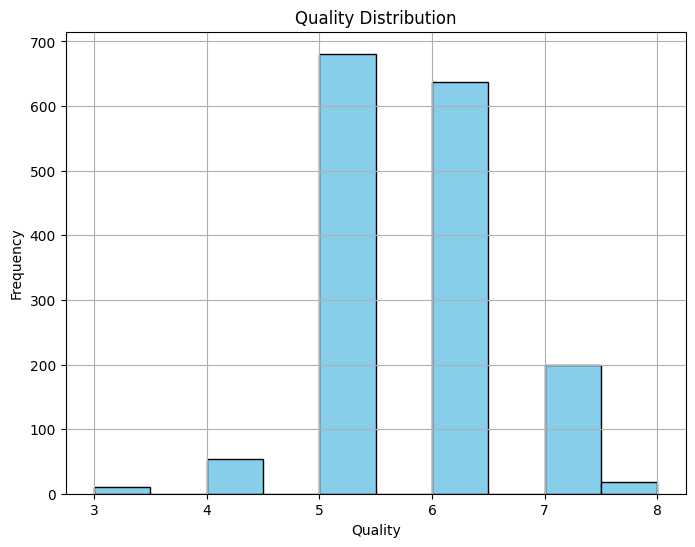

In [ ]:
plt.figure(figsize=(8, 6))
winedata['quality'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

Boxplot of 'alcohol' vs 'quality'

<ipython-input-83-a00795c381af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=winedata, palette='viridis')


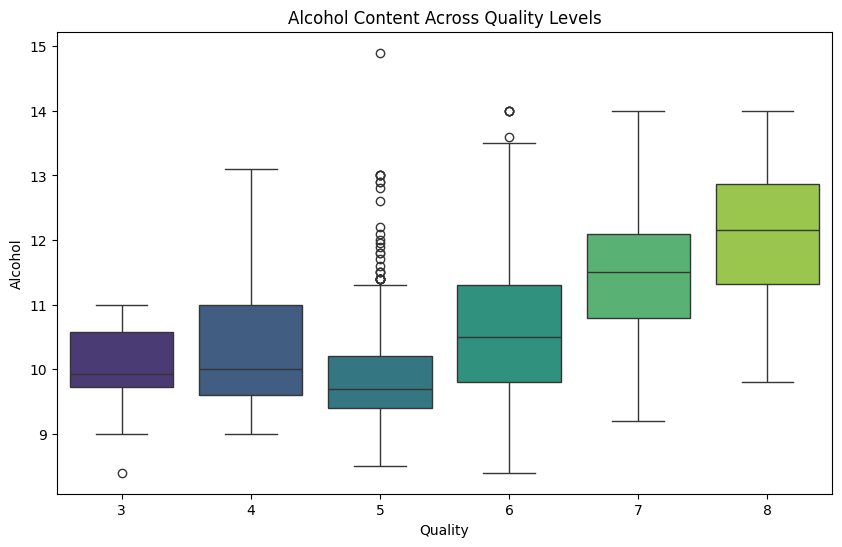

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=winedata, palette='viridis')
plt.title('Alcohol Content Across Quality Levels')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

Scatter plot of 'alcohol' vs 'quality'

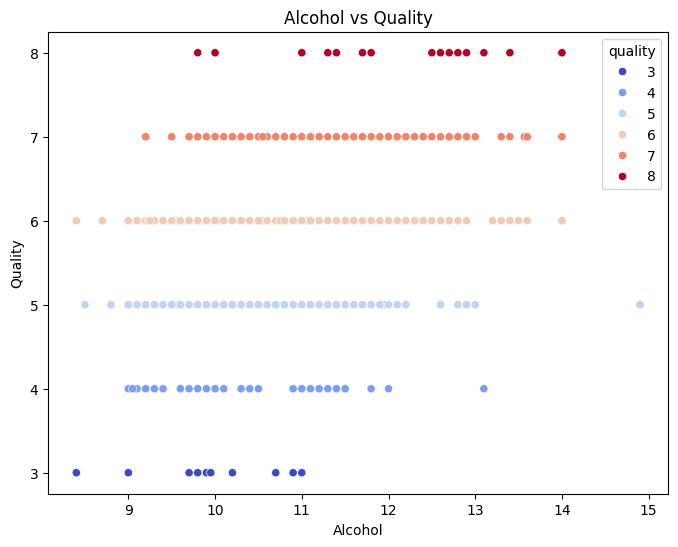

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='quality', data=winedata, hue='quality', palette='coolwarm')
plt.title('Alcohol vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

Pairplot for a selected features with the qualitu

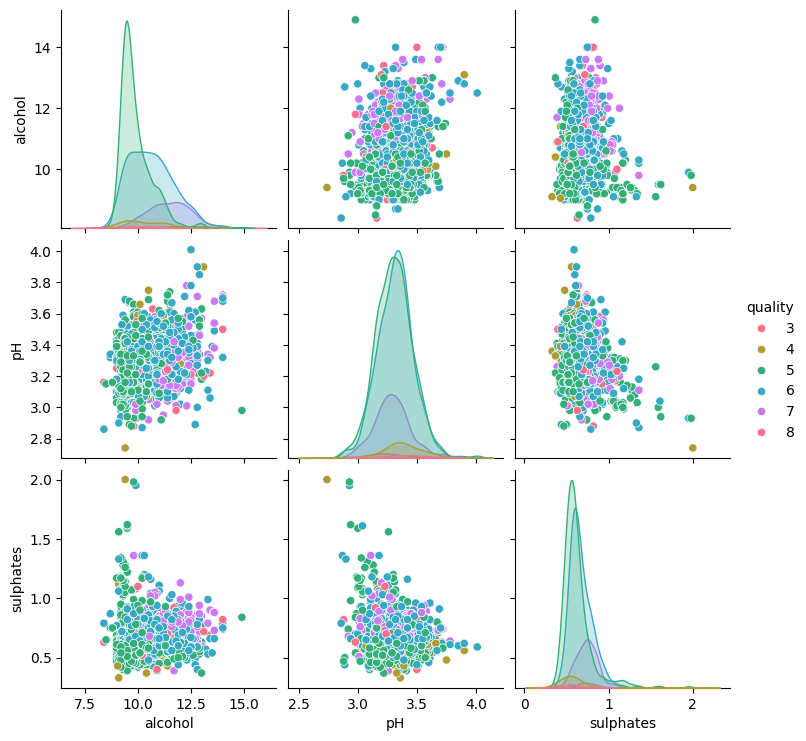

In [ ]:
selected_features = ['alcohol', 'quality', 'pH', 'sulphates']
sns.pairplot(winedata[selected_features], hue='quality', palette='husl')
plt.show()

Bar chart for average alcohol per quality level

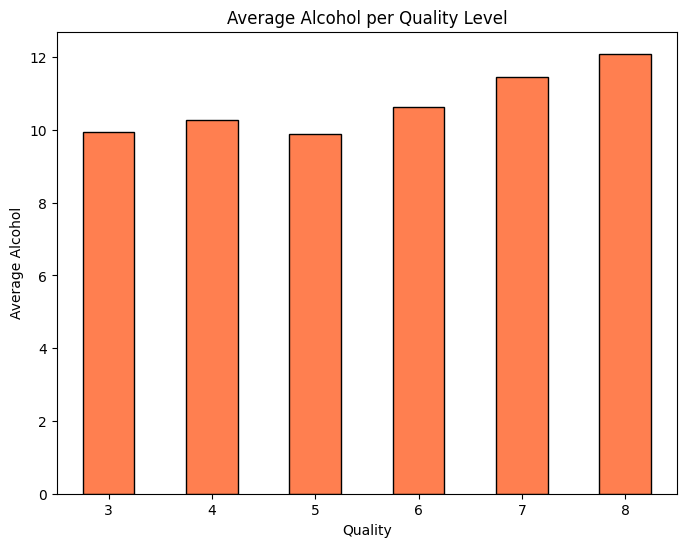

In [ ]:
average_features = winedata.groupby('quality')[['alcohol', 'residual sugar', 'pH']].mean()
plt.figure(figsize=(8, 6))
average_features['alcohol'].plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Alcohol per Quality Level')
plt.xlabel('Quality')
plt.ylabel('Average Alcohol')
plt.xticks(rotation=0)
plt.show()

data standarization

In [ ]:
# column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#                 'pH', 'sulphates', 'alcohol', 'quality']
# winedata = pd.DataFrame(winedata, columns=column_names)

# scaler = StandardScaler()
# scaler.fit(winedata)

# winedata_scaled = scaler.transform(winedata)
# winedata_scaled = pd.DataFrame(winedata_scaled, columns=winedata.columns)



In [ ]:
x=winedata.drop(columns='quality',axis=1)

In [ ]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

label Binarization

In [ ]:
winedata['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
y=winedata['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [ ]:
print (y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1599, 11) (1279, 11) (320, 11)


Model Training

Random forest classifier

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
x_train_pred=model.predict(x_train)
x_train_accur=accuracy_score(x_train_pred,y_train)

In [ ]:
print('x_train_accuracy',x_train_accur)

x_train_accuracy 1.0


In [ ]:
x_test_predection=model.predict(x_test)
x_test_accur=accuracy_score(x_test_predection,y_test)

In [ ]:
print('x_test_accurracy',x_test_accur)

x_test_accurracy 0.934375


In [ ]:
Input_data=()

#Changing the Input_data to a nimpy array
Input_data_as_numpy_array=np.asarray(Input_data)

#reshape the np array as we predicting for one instance
Input_data_reshaped=Input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(Input_data_reshaped)
print(prediction)

if(prediction[0]==1):
  print('the quality of wine is good')
else:
  print('the object is bad')


[0]
the quality of wine is bad


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
